In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from scipy.stats import norm
import pylab
import scipy.stats as stats

In [2]:
%matplotlib inline
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('top250-00-19.csv')

In [4]:
data = data.sort_values('Age', ascending=False)
data.fillna(data['Market_value'].mean(), inplace=True)
#removing the outliers
data = data.iloc[40:]
data = data.iloc[:-40]
data.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
2543,Ricardo Carvalho,Centre-Back,32,Chelsea,Premier League,Real Madrid,LaLiga,2010-2011,1.750000e+07,8000000
132,Kennet Andersson,Centre-Forward,32,Bologna,Serie A,Fenerbahce,Süper Lig,2000-2001,8.622469e+06,4500000
4312,Fernando Llorente,Centre-Forward,32,Swansea,Premier League,Spurs,Premier League,2017-2018,6.000000e+06,15100000
3643,Alberto Gilardino,Centre-Forward,32,Genoa,Serie A,GZ Evergrande,Super League,2014-2015,5.000000e+06,5500000
3642,Rickie Lambert,Centre-Forward,32,Southampton,Premier League,Liverpool,Premier League,2014-2015,5.000000e+06,5500000


In [6]:
data.count()

Name            4620
Position        4620
Age             4620
Team_from       4620
League_from     4620
Team_to         4620
League_to       4620
Season          4620
Market_value    4620
Transfer_fee    4620
dtype: int64

In [7]:
data = data.dropna(how='any',axis=0)

In [8]:
data.count()


Name            4620
Position        4620
Age             4620
Team_from       4620
League_from     4620
Team_to         4620
League_to       4620
Season          4620
Market_value    4620
Transfer_fee    4620
dtype: int64

In [9]:
age_transfer = data.groupby(['Age'])['Transfer_fee'].sum()
age_top = age_transfer.sort_values(ascending=False)
age_top.head()


Age
24    5407570000
25    5195030000
23    5042080000
26    4530580000
27    4297980000
Name: Transfer_fee, dtype: int64

In [10]:

age_top = age_top//1000000
age_top.sort_index(inplace=True)
age_top.head()
#since we are using such large numbers, we will divide by 1000000 to get in terms of millions
#we also sort in terms of the age of the player

Age
18     677
19    1565
20    2724
21    3428
22    4110
Name: Transfer_fee, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

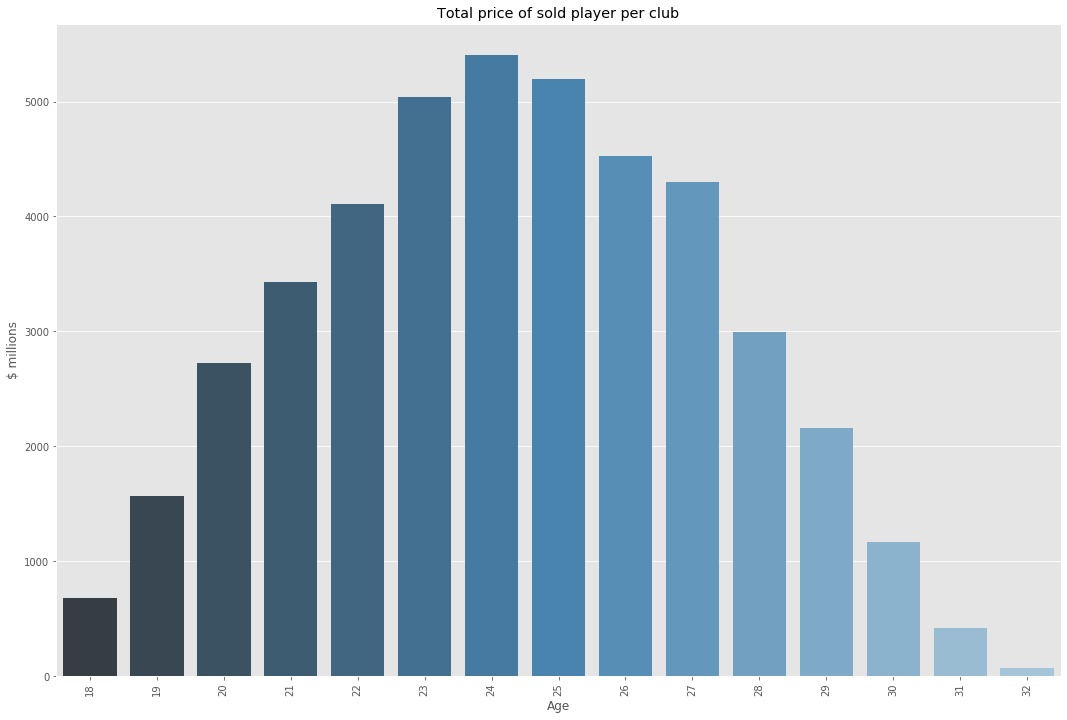

In [11]:
plt.figure(figsize=(18,12))
g = sns.barplot(age_top.index, age_top.values, palette="Blues_d")
g.set_title("Total price of sold player per club")
g.set(ylabel="$ millions", xlabel="Age")
plt.xticks(rotation=90)

In [12]:
df = data
df['delta'] = data["Transfer_fee"] - data["Market_value"]
hyp_delta = df
df.head()


,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee,delta
2543,Ricardo Carvalho,Centre-Back,32,Chelsea,Premier League,Real Madrid,LaLiga,2010-2011,1.750000e+07,8000000,-9.500000e+06
132,Kennet Andersson,Centre-Forward,32,Bologna,Serie A,Fenerbahce,Süper Lig,2000-2001,8.622469e+06,4500000,-4.122469e+06
4312,Fernando Llorente,Centre-Forward,32,Swansea,Premier League,Spurs,Premier League,2017-2018,6.000000e+06,15100000,9.100000e+06
3643,Alberto Gilardino,Centre-Forward,32,Genoa,Serie A,GZ Evergrande,Super League,2014-2015,5.000000e+06,5500000,5.000000e+05
3642,Rickie Lambert,Centre-Forward,32,Southampton,Premier League,Liverpool,Premier League,2014-2015,5.000000e+06,5500000,5.000000e+05


In [13]:
delta_transfer = data.groupby(['Age'])['delta'].sum()
mkt_top = delta_transfer.sort_values(ascending=False)
mkt_top.sort_index(inplace=True)
mkt_top.head()


Age
18    2.345207e+08
19    4.242590e+08
20    6.419975e+08
21    4.166587e+08
22    5.740442e+08
Name: delta, dtype: float64

In [14]:
mkt_top = mkt_top 
mkt_top = mkt_top//1000000
mkt_top.head()

Age
18    234.0
19    424.0
20    641.0
21    416.0
22    574.0
Name: delta, dtype: float64

In [15]:
club_from_sum = data.groupby(['Team_from'])['Transfer_fee'].sum()
club_from_count = data.groupby(['Team_from'])['Transfer_fee'].count()
club_from_mean_price = (club_from_sum/1000000) / club_from_count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

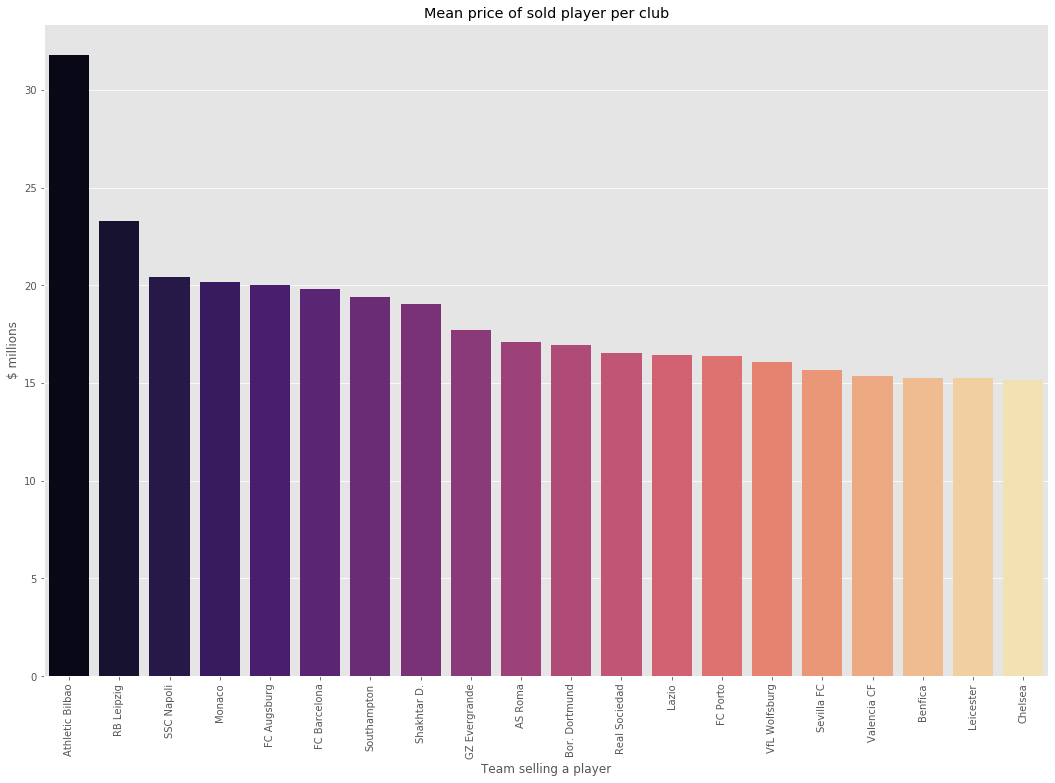

In [16]:
plt.figure(figsize=(18,12))
sell_avg = club_from_mean_price.sort_values(ascending=False)[:20]
g = sns.barplot(sell_avg.index, sell_avg.values, palette="magma")
g.set_title("Mean price of sold player per club")
g.set(ylabel="$ millions", xlabel="Team selling a player")
plt.xticks(rotation=90)

In [17]:
club_to_sum = data.groupby(['Team_to'])['Transfer_fee'].sum()
club_to_count = data.groupby(['Team_to'])['Transfer_fee'].count()
club_to_mean_price = (club_to_sum/1000000) / club_to_count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

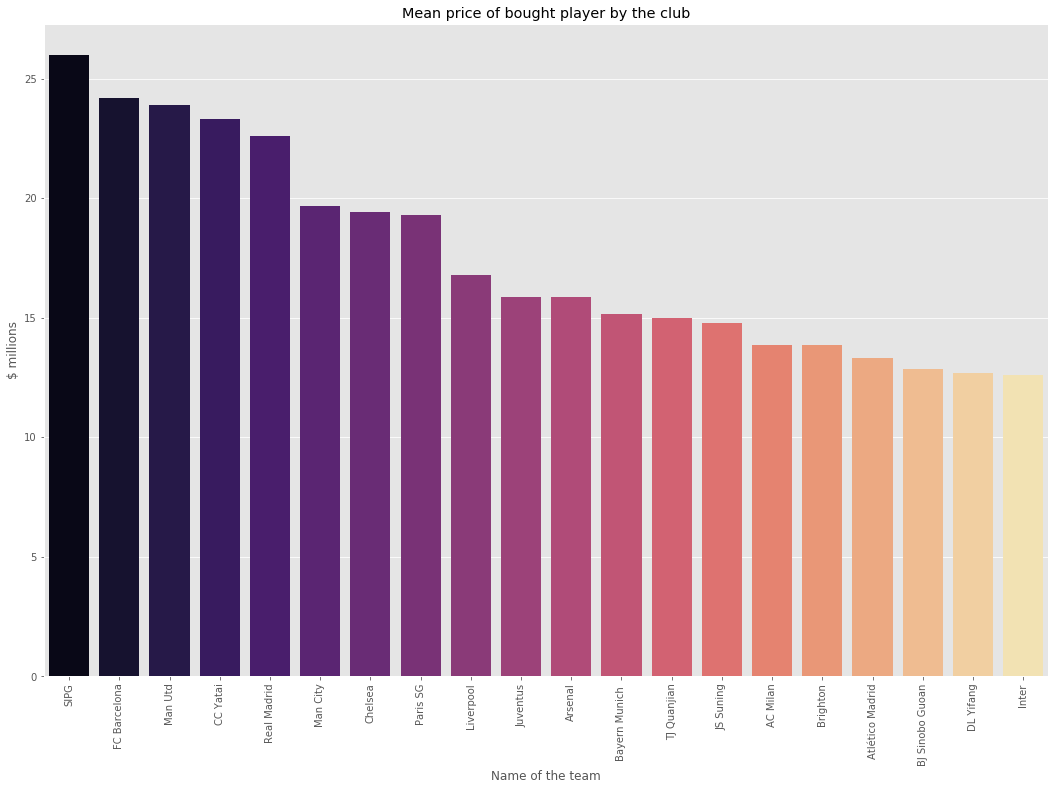

In [18]:
plt.figure(figsize=(18,12))
buy_avg = club_to_mean_price.sort_values(ascending=False)[:20]
g = sns.barplot(buy_avg.index, buy_avg.values, palette="magma")
g.set_title("Mean price of bought player by the club")
g.set(ylabel="$ millions", xlabel="Name of the team")
plt.xticks(rotation=90)

In [19]:
diff_club = club_from_sum - club_to_sum
diff_club = diff_club.sort_values(ascending=False)
diff_club = diff_club.dropna()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

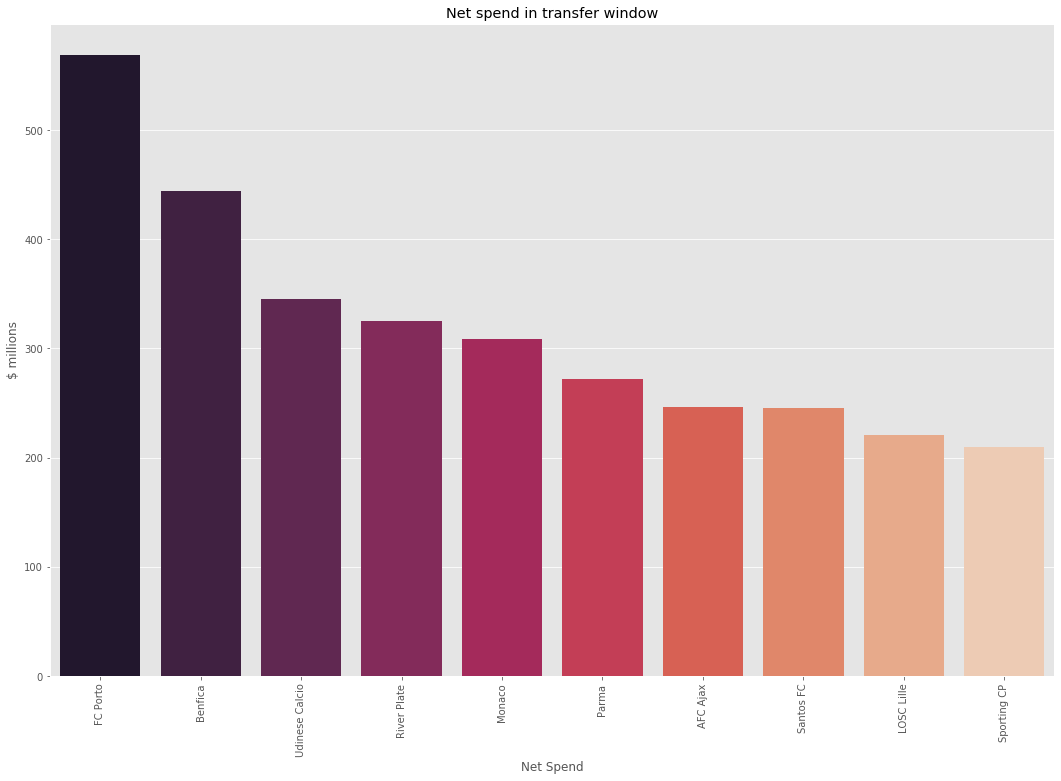

In [20]:
diff_club = diff_club/1000000
profit = diff_club.sort_values(ascending=False)[:10]
plt.figure(figsize=(18,12))
g = sns.barplot(profit.index, profit.values, palette="rocket")
g.set_title("Net spend in transfer window")
g.set(ylabel="$ millions", xlabel="Net Spend")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

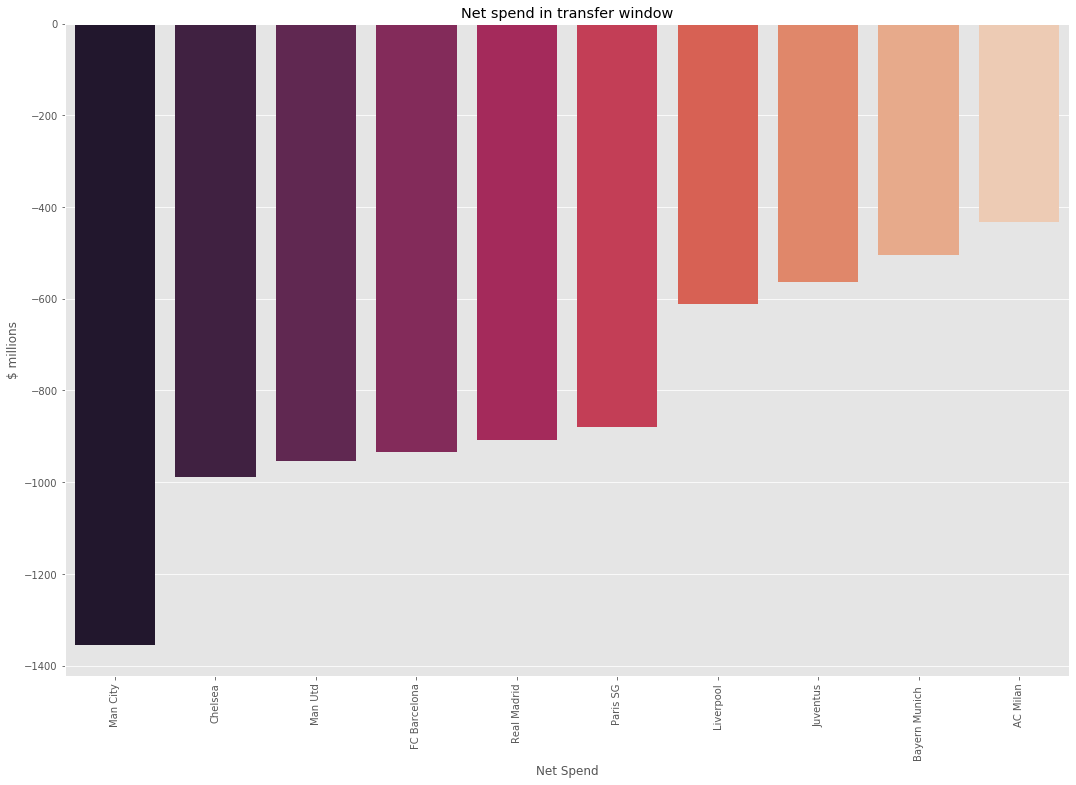

In [21]:
loss = diff_club.sort_values(ascending=True)[:10]
plt.figure(figsize=(18,12))
g = sns.barplot(loss.index, loss.values, palette="rocket")
g.set_title("Net spend in transfer window")
g.set(ylabel="$ millions", xlabel="Net Spend")
plt.xticks(rotation=90)

In [22]:
Position = data.groupby(['Position'])['Transfer_fee'].sum()
Position = Position.sort_values(ascending=False)
Position = Position // 1000000
Position.head()

Position
Centre-Forward        11458
Centre-Back            5982
Central Midfield       4887
Attacking Midfield     4153
Defensive Midfield     3665
Name: Transfer_fee, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

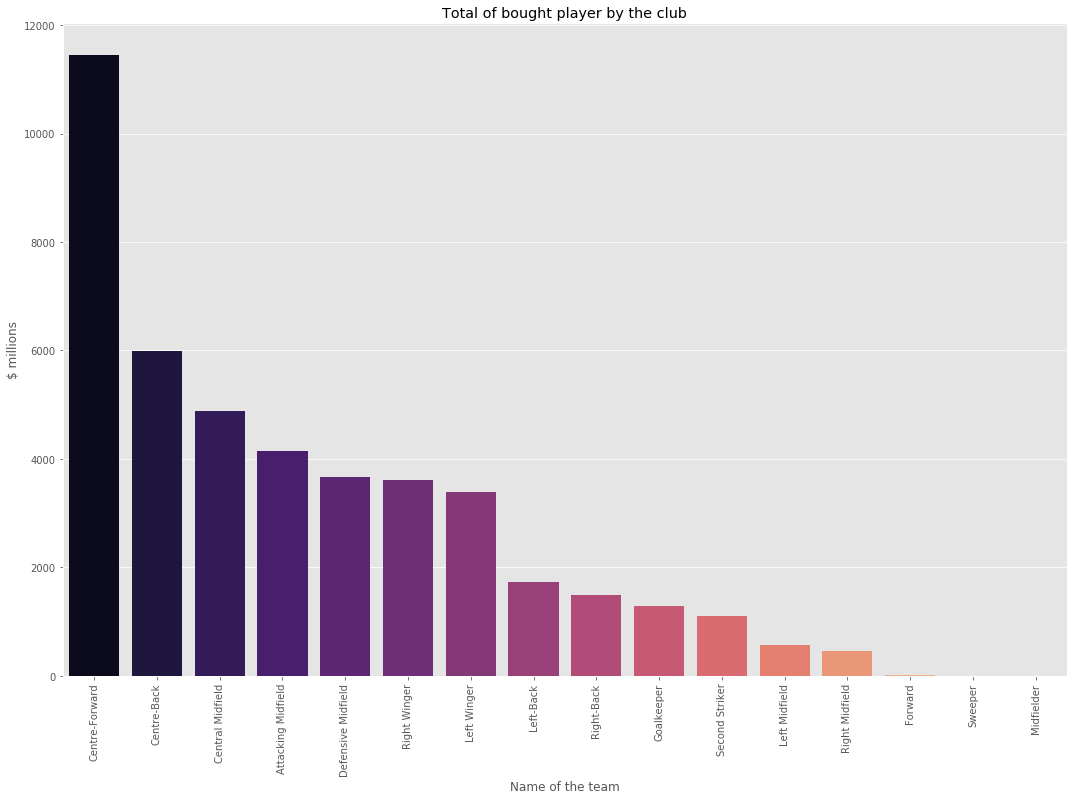

In [23]:
plt.figure(figsize=(18,12))
g = sns.barplot(Position.index, Position.values, palette="magma")
g.set_title("Total of bought player by the club")
g.set(ylabel="$ millions", xlabel="Name of the team")
plt.xticks(rotation=90)

In [24]:
df_from_top3_league = data[data.League_from.isin(['Serie A','Premier League','LaLiga'])]

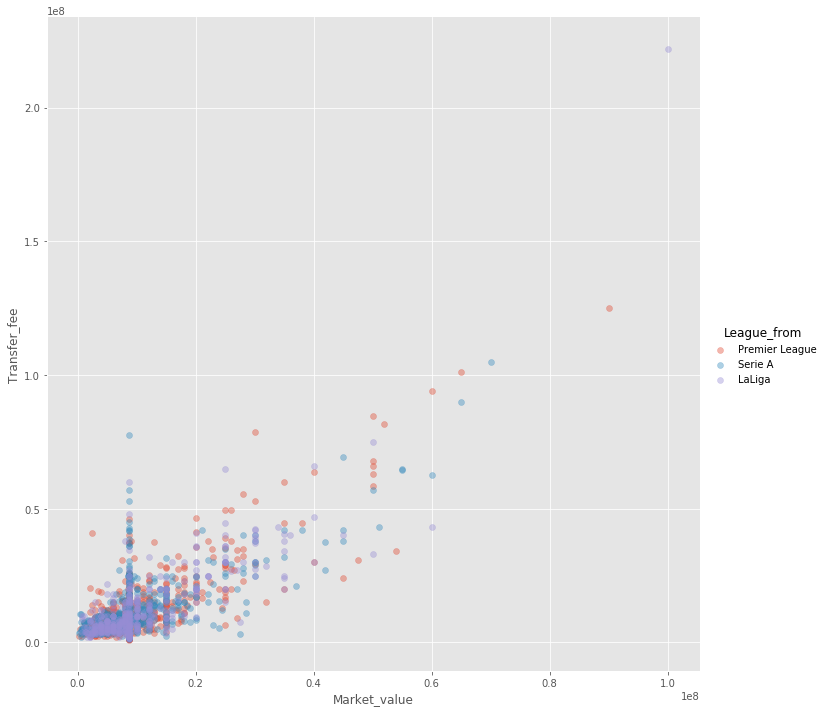

In [25]:
sns.FacetGrid(df_from_top3_league, hue="League_from", height=10).\
map(plt.scatter, "Market_value", "Transfer_fee",alpha=0.4).add_legend()

In [26]:
#To find the correlation between variables
data1 = pd.read_csv('top250-00-19.csv')

data1.fillna(data1['Market_value'].mean(), inplace=True)

In [27]:
null = data1.columns[data1.isnull().any()]
data1[null].isnull().sum()
data = data.sort_values('Age', ascending=False)
data = data.iloc[40:]
data = data.iloc[:-40]

#So we have found out that 1260 datapoints in our csv file are null
data1 = data1.dropna(how='any',axis=0)
#Dropping null values (as it consists of 26% of our dataset)


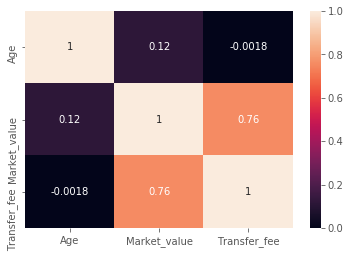

In [28]:
sns.heatmap(data1.corr(),annot=True)

In [29]:
#Hypothesis testing
hyp = pd.read_csv('top250-00-19.csv')
hyp.fillna(hyp['Market_value'].mean(), inplace=True)
hyp = hyp.dropna(how='any',axis=0)
hyp = hyp.sort_values('Transfer_fee', ascending=False)
hyp = hyp.iloc[15:]
hyp = hyp.iloc[:-15]

hyp = hyp.sort_values('Age', ascending=False)
hyp = hyp.iloc[40:]
hyp = hyp.iloc[:-40]


hyp1 = hyp.groupby(['Age'])['Transfer_fee'].sum()
hyp1 = hyp1.sort_values(ascending=False)
hyp1.head()

hyp1 = hyp1//1000000
hyp1.sort_index(inplace=True)
#print(hyp.loc[df['Age'] == 33])


In [30]:
hype = hyp.filter(['Age'])
hype = hyp.sort_values('Age')

hype.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
2555,James Rodríguez,Attacking Midfield,18,CA Banfield,Torneo Final,FC Porto,Liga NOS,2010-2011,2.500000e+06,7350000
1587,Denílson,Defensive Midfield,18,São Paulo,Série A,Arsenal,Premier League,2006-2007,8.622469e+06,5000000
1663,David Cotterill,Right Winger,18,Bristol City,League One,Wigan,Premier League,2006-2007,4.000000e+05,3200000
1586,Mousa Dembélé,Central Midfield,18,Willem II,Eredivisie,AZ Alkmaar,Eredivisie,2006-2007,1.750000e+06,5000000
383,Eduardo Costa,Defensive Midfield,18,Grêmio,Brazil,G. Bordeaux,Ligue 1,2001-2002,8.622469e+06,5000000


In [31]:
fin = hype['Age'].value_counts()
fin = fin.sort_values(ascending=False)
fin.sort_index(inplace=True)
fin = fin[:-3]

In [32]:
hyp_delta = hyp_delta.sort_values('Age', ascending=True)
hyp_delta.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee,delta
1484,Sergio Agüero,Centre-Forward,18,Independiente,Torneo Final,Atlético Madrid,LaLiga,2006-2007,5.000000e+06,21700000,1.670000e+07
3110,Ángelo Henríquez,Centre-Forward,18,U. de Chile,Primera División,Man Utd,Premier League,2012-2013,1.500000e+05,5500000,5.350000e+06
1586,Mousa Dembélé,Central Midfield,18,Willem II,Eredivisie,AZ Alkmaar,Eredivisie,2006-2007,1.750000e+06,5000000,3.250000e+06
3980,Renato Sanches,Central Midfield,18,Benfica,Liga NOS,Bayern Munich,1.Bundesliga,2016-2017,1.000000e+07,35000000,2.500000e+07
120,Vicente,Left Winger,18,Levante UD,LaLiga2,Valencia CF,LaLiga,2000-2001,8.622469e+06,4800000,-3.822469e+06


In [33]:
hyp_delta_transfer = hyp_delta.groupby(['Age'])['delta'].sum()
mkt = hyp_delta_transfer.sort_values(ascending=False)
mkt.sort_index(inplace=True)
mkt = mkt/1000000
mkt = mkt/fin
mkt = mkt.dropna(how='any',axis=0)
mkt.head(16)

18    3.045724
19    2.586945
20    2.139992
21    1.135310
22    1.253372
23    1.330057
24    0.965920
25    1.019405
26    0.672153
27    0.905635
28   -0.531924
29   -0.467053
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

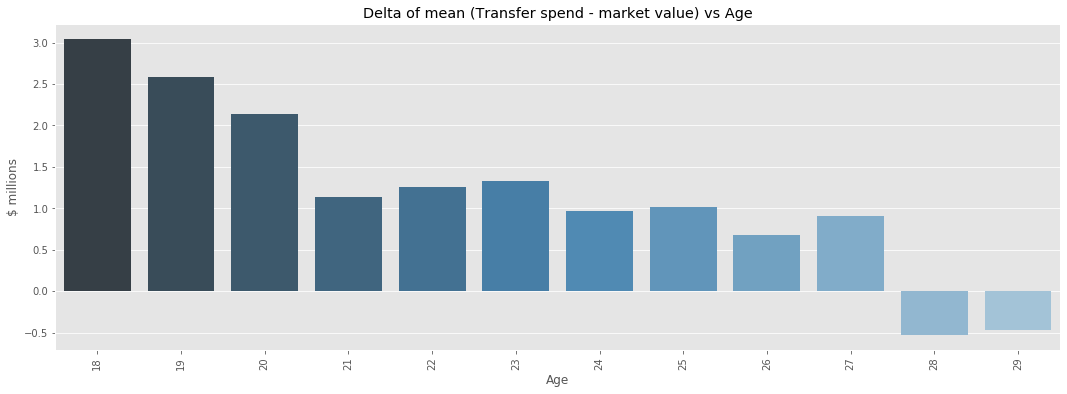

In [34]:
plt.figure(figsize=(18,6))
g = sns.barplot(mkt.index, mkt.values, palette="Blues_d")
g.set_title("Delta of mean (Transfer spend - market value) vs Age")
g.set(ylabel="$ millions", xlabel="Age")
plt.xticks(rotation=90)

In [35]:
x = list(mkt)
y = list(mkt)
print(x)

[3.0457237994563577, 2.5869450953630198, 2.1399916763565914, 1.1353097078765626, 1.2533715090890656, 1.330056731115921, 0.9659203838742183, 1.0194046438813478, 0.672153441641989, 0.9056353226599587, -0.5319242759309455, -0.4670529737586409]


In [36]:
perc = []
x.pop()
y.pop(0)

zip_object = zip(x, y)
for list1_i, list2_i in zip_object:
    if(list1_i>0 or list2_i>0):
        perc.append(((list1_i-list2_i)/list1_i*100))
    else:
        perc.append(((list1_i-list2_i)/abs(list1_i)*100))
print(perc)

[15.063043608065415, 17.277267299084617, 46.94793814294334, -10.39908320993053, -6.118315397370832, 27.377504938168418, -5.537129239638674, 34.0641181422533, -34.73639597047989, 158.7349303435538, -12.19558969343339]


In [37]:
total = sum(perc)
length = len(perc)
average = total/length
print(average)

20.95257172392869


In [38]:
fin = hype['Position'].value_counts()
fin = fin.sort_values(ascending=False)
fin.sort_index(inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

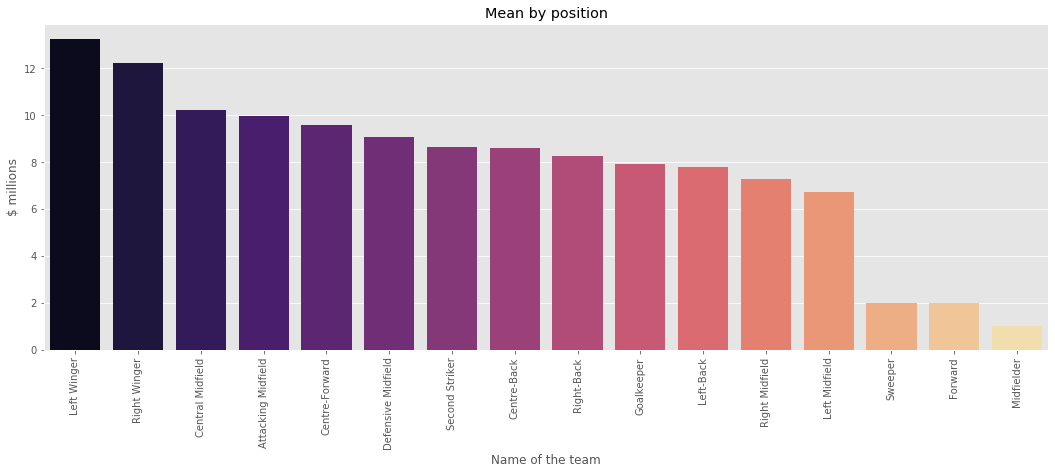

In [39]:
ppm = Position/fin
plt.figure(figsize=(18,6))
ppm = ppm.sort_values(ascending=False)
g = sns.barplot(ppm.index, ppm.values, palette="magma")
g.set_title("Mean by position")
g.set(ylabel="$ millions", xlabel="Name of the team")
plt.xticks(rotation=90)


In [40]:
hyp1 = pd.read_csv('top250-00-19.csv')
hyp1 = hyp1.dropna(how='any',axis=0)
hyp1 = hyp1.sort_values('Transfer_fee', ascending=False)
season_wise = hyp.groupby('Season')['Transfer_fee'].agg('sum').reset_index()


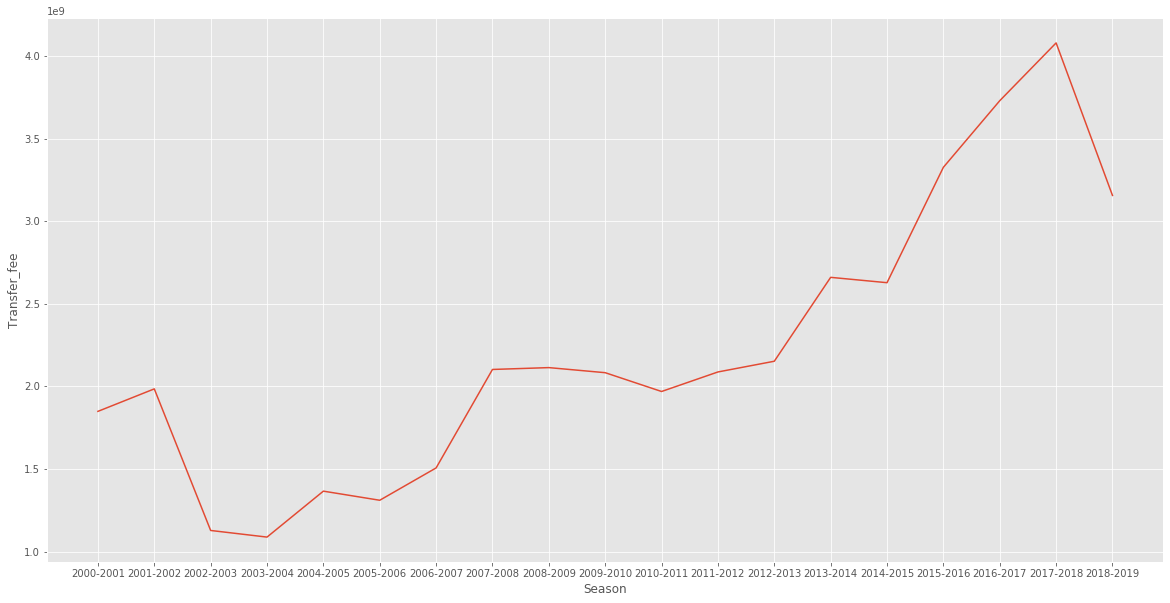

In [41]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Season', y='Transfer_fee', data = season_wise)

In [42]:
#Normalization of data
dfn = pd.read_csv('top250-00-19.csv')
dfn.fillna(dfn['Market_value'].mean(), inplace=True)
null = dfn.columns[dfn.isnull().any()]
dfn[null].isnull().sum()
dfn = dfn.sort_values('Age', ascending=False)
dfn = dfn.dropna(how='any',axis=0)
scaler = preprocessing.MinMaxScaler()

In [43]:
age_mean = dfn['Age'].mean()
mkt_mean = dfn['Market_value'].mean()
transfer_mean = dfn['Transfer_fee'].mean()
age_var = dfn['Age'].var()
mkt_var = dfn['Market_value'].var()
transfer_var = dfn['Transfer_fee'].var()


In [44]:

#Alternate way to standardize
#cols_to_scale = ['Age','Market_value', 'Transfer_fee' ]

#dfn[cols_to_norm] = StandardScaler().fit_transform(dfn[cols_to_norm])

#Standardize values
dfn['Age'] = (dfn['Age'] - dfn['Age'].mean())/(dfn['Age'].std())
dfn['Market_value'] = (dfn['Market_value'] - dfn['Market_value'].mean())/(dfn['Market_value'].std())
dfn['Transfer_fee'] = (dfn['Transfer_fee'] - dfn['Transfer_fee'].mean())/(dfn['Transfer_fee'].std())
print(dfn)

                     Name          Position       Age        Team_from  \
112   José Luis Chilavert        Goalkeeper  3.299879  Vélez Sarsfield   
487      Claudio Taffarel        Goalkeeper  3.299879      Galatasaray   
2954           Shay Given        Goalkeeper  3.299879         Man City   
2414           Zé Roberto     Left Midfield  3.299879         Nacional   
1179       Sonny Anderson    Centre-Forward  2.990358    Villarreal CF   
...                   ...               ...       ...              ...   
4273      Pietro Pellegri    Centre-Forward -2.581002            Genoa   
1306    Slobodan Rajkovic       Centre-Back -2.581002      OFK Beograd   
1254         Theo Walcott      Right Winger -2.581002      Southampton   
1370          Fran Mérida  Central Midfield -2.890522   Barcelona Yth.   
236     Marzouq Al-Otaibi    Centre-Forward -7.533322           Shabab   

           League_from        Team_to       League_to     Season  \
112          Argentina  R. Strasbourg      

In [45]:
age_mean1 = dfn['Age'].mean()
mkt_mean1 = dfn['Market_value'].mean()
transfer_mean1 = dfn['Transfer_fee'].mean()
age_var1 = dfn['Age'].var()
mkt_var1 = dfn['Market_value'].var()
transfer_var1 = dfn['Transfer_fee'].var()


In [46]:
print(age_mean, age_mean1)
print(mkt_mean, mkt_mean1)
print(transfer_mean, transfer_mean1)



24.33872340425532 -7.852820049072064e-15
8622469.476744404 -2.8753471665449066e-14
9447586.170212766 -2.2157216959540357e-17


In [47]:
print(age_var, age_var1)
print(mkt_var, mkt_var1)
print(transfer_var, transfer_var1)

10.43812563107602 0.9999999999999928
56613013012725.29 0.999999999999987
108945984643562.27 0.9999999999999925


In [48]:
pos = dfn.groupby(['Age'])['Transfer_fee'].sum()
pos.head()

Age
-7.533322   -0.713526
-2.890522   -0.598559
-2.581002   -1.319815
-2.271482   -7.056569
-1.961962   -2.959657
Name: Transfer_fee, dtype: float64

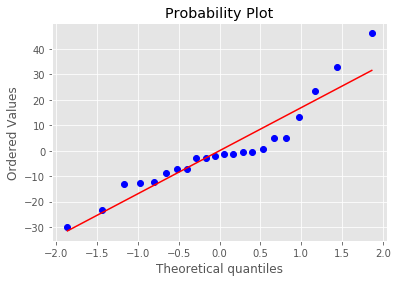

In [49]:
stats.probplot(pos.values, dist="norm", plot=pylab)
pylab.show()